In [0]:
import sqlalchemy
import pandas as pd
import numpy as np
import re
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# before starting to work in this notebook I've converted decisions texts from .txt format to database

engine = sqlalchemy.create_engine('sqlite:////content/gdrive/My Drive/Data/decision_texts.db')\

con = engine.connect()

# query = con.execute("SELECT id, text FROM texts")

In [0]:
text_df = pd.DataFrame(query.fetchall())
text_df.columns = query.keys()

In [0]:
def find_str_index(row):

    pattern = re.compile(r'постановив:?\s{2}|вирішив:?\s{2}', re.I)

    match = re.search(pattern, row)

    if match:
        
        idx = match.start()
        
        

        return row[:idx]

    else:

        return None

In [0]:
text_df['cut_text'] = text_df.text.apply(find_str_index)

In [0]:
text_df['cut_text'].dropna(inplace=True)

In [0]:
sample = text_df.cut_text.iloc[0]

In [0]:
skip + '№<>'

In [0]:
from string import digits, punctuation, ascii_letters

skip = digits + punctuation + ascii_letters + '№'

vowels = [i.strip() for i in 'а, е, є, и, і, ї, й, о, у, ю, я'.split(',')]


def get_lemmas(string):
    
    lemmas_list = []
    
    split = string.split()
    
    for word in split:
        
        if word[0] in skip or word[-1] in skip:
            continue
        
        
        word = word.lower()
        
        if len(word) > 5:
            
            red_len = len(word) - 2
            
            if word[:red_len][-1] in vowels:
                
                red_len -= 1
                
                
            else:
                
                pass
            
            lemmas_list.append(word[:red_len])
                
                
                
        else:
            lemmas_list.append(word)
            
    return ' '.join(lemmas_list)

In [0]:
text_df['lemmatized'] = text_df.cut_text.apply(get_lemmas)

In [0]:
da_all = pd.read_csv('/content/gdrive/My Drive/da_all.csv')

text_merged = pd.merge(text_df, da_all[['id', 'outcome']])

text_merged.shape

(21199, 5)

In [0]:
text_merged.dropna(inplace=True)

In [0]:
text_merged.shape

(19993, 5)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

vectorizer = TfidfVectorizer()

In [0]:
tf = vectorizer.fit_transform(text_merged['lemmatized'])

In [0]:
gnb = GaussianNB()

In [0]:
logreg = LogisticRegression()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(tf, text_merged['outcome'].values, test_size=0.2, random_state=42)

In [0]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.816704176044011
              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77      1654
         1.0       0.82      0.88      0.85      2345

   micro avg       0.82      0.82      0.82      3999
   macro avg       0.82      0.80      0.81      3999
weighted avg       0.82      0.82      0.81      3999



In [0]:
text_merged.outcome.mean() # proportion has been kept

0.5902065723003052

In [0]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
%matplotlib inline

In [0]:
svd = TruncatedSVD(n_components=3)
svd_result = svd.fit_transform(tf)

svd_1 = svd_result[:,0]
svd_2 = svd_result[:,1]
svd_3 = svd_result[:,2]

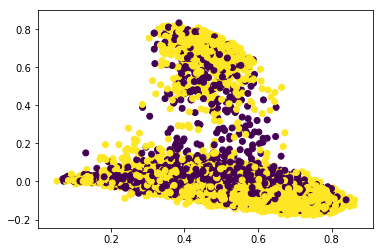

In [0]:
plt.scatter(svd_1, svd_2, c=text_merged.outcome, cmap='viridis'); # from 2D doesn't seems like it is lineary separable

In [0]:
viz = pd.DataFrame({'f1': svd_1,
             'f2': svd_2,
             'f3': svd_3,
             'outcome': text_merged.outcome,
             'outcome_text': np.where(viz.outcome == 1, 'Approval', 'Refusal')})



viz.head()

,f1,f2,f3,outcome,outcome_text
0,0.530804,0.623379,-0.094189,0.0,Refusal
1,0.404194,0.026445,0.054057,1.0,Approval
2,0.453565,0.027960,0.465388,1.0,Approval
3,0.592428,-0.085540,-0.099448,1.0,Approval
4,0.654744,-0.077483,-0.095306,0.0,Refusal


array(['Refusal', 'Approval', 'Approval', ..., 'Approval', 'Approval',
       'Approval'], dtype='<U8')

In [0]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.plotly as py
import plotly.graph_objs as go


init_notebook_mode(connected=True)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

data = []

cmin = 0
cmax = 19

for idx in viz['outcome'].unique():
  
  x, y, z = viz[viz['outcome']==idx]['f1'].values, viz[viz['outcome']==idx]['f2'].values, viz[viz['outcome']==idx]['f3'].values

  trace = go.Scatter3d(
      x=x,
      y=y,
      z=z, 
      name = viz[viz['outcome']==idx]['outcome_text'].values[0], 
      text = viz[viz['outcome']==idx]['outcome_text'].values[0],
      mode='markers',
      marker=dict(
          size=4,
          cmin = cmin,
          cmax = cmax,
          color = idx,
          colorscale='Viridis',# set color to an array/list of desired values
            # choose a colorscale
          opacity=0.8, 
      )
  )
        
  data.append(trace)


layout = go.Layout(
    hovermode= 'closest', legend=dict(x=-.1, y=1),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
text_merged[['id', 'lemmatized', 'outcome']].head()

,id,lemmatized,outcome
0,71397188,київськ апеляційн господарськ суд постан імен ...,0.0
1,71397056,господарськ суд рівненськ облас імен укра ріше...,1.0
2,71397202,господарськ суд черкаськ облас бульв канцеляр ...,1.0
3,71396733,господарськ суд івано-франківськ облас рішен і...,1.0
4,71397148,господарськ суд черкаськ облас бульв канцеляр ...,0.0


In [0]:
text_merged[['id', 'lemmatized', 'outcome']].to_csv('text_merged.csv', index=False)

In [0]:
!zip text_merged text_merged.csv

  adding: text_merged.csv (deflated 83%)


In [0]:
!ls -lh

total 586M
drwx------ 3 root root 4.0K Apr 26 18:41 gdrive
drwxr-xr-x 1 root root 4.0K Apr  4 20:20 sample_data
-rw-r--r-- 1 root root 469M Apr 26 20:13 text_merged.csv
-rw-r--r-- 1 root root  81M Apr 26 21:52 text_merged.zip
-rw-r--r-- 1 root root 7.3M Apr 26 20:31 weights-improvement-01-0.77.hdf5
-rw-r--r-- 1 root root 7.3M Apr 26 20:31 weights-improvement-02-0.81.hdf5
-rw-r--r-- 1 root root 7.3M Apr 26 20:33 weights-improvement-06-0.83.hdf5
-rw-r--r-- 1 root root 7.3M Apr 26 20:34 weights-improvement-09-0.84.hdf5
-rw-r--r-- 1 root root 7.3M Apr 26 20:35 weights-improvement-11-0.84.hdf5


In [0]:
files.download('text_merged.zip')

# Trying out Neural Network and Embeddings

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.models import load_model
from keras import regularizers
from keras import optimizers
from keras.layers import Embedding, Flatten, Dense, Conv1D, MaxPooling1D, Dropout, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [0]:
!ls

da_all.csv		   family_cases_texts.txt.zip  text_merged.zip
family_cases_1819.csv	   family_texts.csv
family_cases_features.txt  text_merged.csv


In [0]:
!ls -lh all_family_cases.db

ls: cannot access 'all_family_cases.db': No such file or directory


In [0]:
# loading previously saved data

os.chdir('/content/gdrive/My Drive/Data/')


!unzip text_merged.zip

In [0]:
text_merged = pd.read_csv('text_merged.csv')

In [0]:
text_merged.drop_duplicates(subset='id', inplace=True)

In [0]:
maxlen = 30 # at first time this was 30

#max_words = 7000
max_words = 3020


texts = text_merged['lemmatized']

tokenizer = Tokenizer(num_words=max_words, split=' ', lower=True)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(word_index)


labels = text_merged['outcome']

data = pad_sequences(sequences, maxlen=maxlen)

Found 69362 unique tokens.
{'у': 1, 'на': 2, 'та': 3, 'з': 4, 'до': 5, 'за': 6, 'від': 7, 'в': 8, 'що': 9, 'відповід': 10, 'не': 11, 'про': 12, 'догов': 13, 'спр': 14, 'суд': 15, 'і': 16, 'або': 17, 'суду': 18, 'господарськ': 19, 'кодек': 20, 'є': 21, 'а': 22, 'для': 23, 'укра': 24, 'виконан': 25, 'позив': 26, 'судов': 27, 'згід': 28, 'по': 29, 'які': 30, 'стат': 31, 'договор': 32, "зобов'язан": 33, 'стор': 34, 'його': 35, 'вимог': 36, 'як': 37, 'розм': 38, 'рішен': 39, 'розгл': 40, 'підст': 41, 'позов': 42, 'державн': 43, 'року': 44, 'щодо': 45, 'прав': 46, 'товарист': 47, 'умов': 48, 'тов': 49, 'процесуальн': 50, 'встановлен': 51, 'із': 52, 'засідан': 53, 'част': 54, 'вим': 55, 'якщо': 56, 'права': 57, 'позовн': 58, 'також': 59, 'перед': 60, 'позивач': 61, 'право': 62, 'відповідальніс': 63, 'було': 64, 'при': 65, 'облас': 66, 'судом': 67, 'апеляційн': 68, 'відповідач': 69, 'порушен': 70, 'суму': 71, 'стягнен': 72, 'надан': 73, 'орен': 74, 'обмежен': 75, 'строк': 76, 'встановл': 77, '

In [0]:
from keras.utils import to_categorical

labels_cat = to_categorical(labels)

In [0]:
X_train, x_val, y_train, y_val = train_test_split(data, labels_cat, test_size=0.2, random_state=42, shuffle=True)

print('Shape of data tensor:', X_train.shape)
print('Shape of label tensor:', y_train.shape)

Shape of data tensor: (15784, 30)
Shape of label tensor: (15784, 2)


In [0]:
# Creating NN

emb_size = 300

model = Sequential()
model.add(Embedding(max_words, emb_size, input_length=maxlen))
model.add(Dropout(0.5))

model.add(Conv1D(32, 5, activation='relu', data_format='channels_first'))

model.add(MaxPooling1D(5))
model.add(Conv1D(32, 5, activation='relu', data_format='channels_first'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 5, activation='relu', data_format='channels_first'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 5, activation='relu', data_format='channels_first'))

model.add(GlobalMaxPooling1D())


model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Dropout(0.7))



model.add(Dense(2, activation='softmax'))


model.summary()

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

stop = EarlyStopping(monitor='val_acc', patience=5)

callbacks_list = [checkpoint, stop]

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=4, batch_size=512, validation_split=0.2, shuffle=True, callbacks=callbacks_list)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 30, 300)           906000    
_________________________________________________________________
dropout_23 (Dropout)         (None, 30, 300)           0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 32, 296)           4832      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 6, 296)            0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 32, 292)           992       
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 6, 292)            0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 32, 288)           992       
__________

In [0]:
files.download('weights-improvement-11-0.84.hdf5')

In [0]:
model = load_model('weights-improvement-12-0.84.hdf5') # here you need to put the name of the best model that keras has saved during the training

#nn_predictions = np.argmax(model.predict(x_test_boost),axis=-1) # also converts from one hot encoding to label from 0 to 19
nn_predictions = np.argmax(model.predict(x_val),axis=-1)

print(accuracy_score(nn_predictions, np.argmax(y_val,axis=-1)))

0.8320243222700785


In [0]:
print(classification_report(nn_predictions, np.argmax(y_val,axis=-1)))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1302
           1       0.94      0.81      0.87      2697

   micro avg       0.84      0.84      0.84      3999
   macro avg       0.82      0.85      0.83      3999
weighted avg       0.86      0.84      0.84      3999



In [0]:
def get_embeddings(X_input, embedding_features, max_words=max_words, emb_size=emb_size, maxlen=maxlen):
  model_emb = Sequential()
  model_emb.add(Embedding(max_words, emb_size, input_length=maxlen, weights=[embeddings_features], trainable=False))
  
  weights_x = model_emb.predict(X_input)

  print(X_input.shape)
  print(weights_x.shape)

  X = np.zeros((X_input.shape[0], emb_size))

  for i, sample in enumerate(weights_x):
    X[i, :] = sample.mean(axis=0)

  print(X.shape)
  
  return X

In [0]:
embeddings_features = model.layers[0].get_weights()[0]

X = get_embeddings(X_train, embeddings_features)

(15994, 30)
(15994, 30, 300)
(15994, 300)


In [0]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline


pca = TSNE(n_components=3)
pca_result = pca.fit_transform(X)

pca_1 = pca_result[:,0]
pca_2 = pca_result[:,1] 
pca_3 = pca_result[:,2]

In [0]:
viz = pd.DataFrame({'f1': pca_1,
             'f2': pca_2,
             'f3': pca_3,
             'outcome': y_train[:, 1],
             'outcome_text': np.where(y_train[:, 1], 'Approval', 'Refusal')})



viz.head()

,f1,f2,f3,outcome,outcome_text
0,12.419394,17.553738,14.156190,1.0,Approval
1,29.501221,-13.545211,-0.355138,1.0,Approval
2,7.718762,7.439301,-19.706776,1.0,Approval
3,16.094095,1.475832,-2.879301,1.0,Approval
4,12.961877,-16.452379,0.462959,1.0,Approval


In [0]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.plotly as py
import plotly.graph_objs as go


init_notebook_mode(connected=True)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

data = []

cmin = 0
cmax = 19

for idx in viz['outcome'].unique():
  
  x, y, z = viz[viz['outcome']==idx]['f1'].values, viz[viz['outcome']==idx]['f2'].values, viz[viz['outcome']==idx]['f3'].values

  trace = go.Scatter3d(
      x=x,
      y=y,
      z=z, 
      name = viz[viz['outcome']==idx]['outcome_text'].values[0], 
      text = viz[viz['outcome']==idx]['outcome_text'].values[0],
      mode='markers',
      marker=dict(
          size=4,
          cmin = cmin,
          cmax = cmax,
          color = idx,
          colorscale='Viridis',# set color to an array/list of desired values
            # choose a colorscale
          opacity=0.8, 
      )
  )
        
  data.append(trace)


layout = go.Layout(
    hovermode= 'closest', legend=dict(x=-.1, y=1),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

Output hidden; open in https://colab.research.google.com to view.